# 전이학습
- cifar10

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 데이터 준비

In [40]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, shuffle=True)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(35000, 32, 32, 3) (15000, 32, 32, 3) (10000, 32, 32, 3)
(35000, 1) (15000, 1) (10000, 1)


In [42]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [43]:
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

# 모델

In [44]:
from tensorflow.keras.applications import VGG16

base = VGG16(weights='imagenet', 
             input_shape=(32, 32, 3),
             include_top=False)
base.trainable=False
base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [48]:
y_train_oh.shape

(35000, 10)

In [49]:
model = keras.Sequential([
    base,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


# 학습

In [51]:
EPOCHS = 100
BATCH_SIZE = 64

log = model.fit(X_train, y_train_oh,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val, y_val_oh),
                verbose = 1)

Epoch 1/100
547/547 [==============================] - 11s 19ms/step - loss: 1.5113 - acc: 0.4759 - val_loss: 1.3224 - val_acc: 0.5405
Epoch 2/100
547/547 [==============================] - 10s 18ms/step - loss: 1.2597 - acc: 0.5621 - val_loss: 1.2535 - val_acc: 0.5690
Epoch 3/100
547/547 [==============================] - 10s 18ms/step - loss: 1.1989 - acc: 0.5858 - val_loss: 1.2129 - val_acc: 0.5847
Epoch 4/100
547/547 [==============================] - 10s 18ms/step - loss: 1.1626 - acc: 0.5935 - val_loss: 1.1915 - val_acc: 0.5911
Epoch 5/100
547/547 [==============================] - 10s 18ms/step - loss: 1.1372 - acc: 0.6033 - val_loss: 1.1844 - val_acc: 0.5935
Epoch 6/100
547/547 [==============================] - 10s 18ms/step - loss: 1.1171 - acc: 0.6096 - val_loss: 1.1760 - val_acc: 0.5923
Epoch 7/100
547/547 [==============================] - 10s 18ms/step - loss: 1.1006 - acc: 0.6169 - val_loss: 1.1648 - val_acc: 0.6020
Epoch 8/100
547/547 [==============================] - 

In [52]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

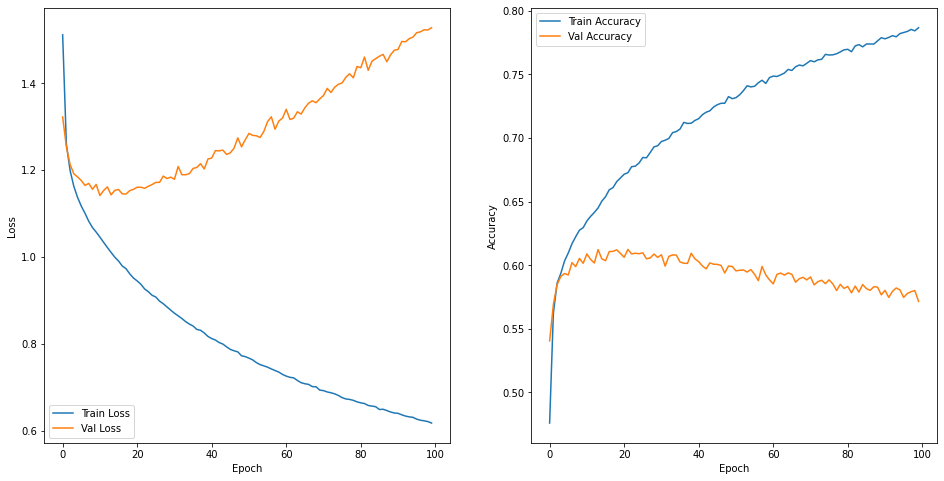

In [53]:
plot_history(log)

In [55]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 4s 10ms/step - loss: 1.5402 - acc: 0.5730


[1.5401806831359863, 0.5730000138282776]

In [56]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred

313/313 [==============================] - 3s 9ms/step


array([4.1593721e-06, 6.8915121e-02, 7.0727710e-04, ..., 9.9886107e-01,
       2.2774937e-05, 1.0043040e-05], dtype=float32)

In [62]:
y_pred = (y_pred > 0.5).astype(int)                                #y_pred > 0.5 기준 [1,0]으로 변경
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [64]:
y_test_oh = y_test_oh.flatten()

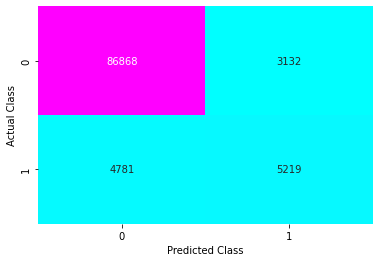

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfm = confusion_matrix(y_test_oh, y_pred)
sns.heatmap(cfm, annot=True, cbar=False, cmap='cool', fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()